<a href="https://colab.research.google.com/github/MarkeyBass/pytorch-play/blob/main/simple_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
# Creat a Model Class that inherits nn.Module
class Model(nn.Module):
    # Input layer (4 features of the flower) -->
    # Hidden Layer1 (number of neurons) -->
    # H2 (n) -->
    # output (2classes of iris flowers)
    def __init__(self, in_features=4, h1=8, h2=9, out_feaures=3):
      super().__init__() # instantiate nn.Module
      #  fully connected 1
      self.fc1 = nn.Linear(in_features, h1)
      self.fc2 = nn.Linear(h1, h2)
      self.out = nn.Linear(h2, out_feaures)

    def forward(self, x):
      # ReLU: If x <= 0, returns 0. If x > 0, returns x (no upper limit).
      x = F.relu(self.fc1(x))
      x = F.relu(self.fc2(x))
      x = self.out(x)
      return x

In [3]:
# Pick a manual seed for randomization
torch.manual_seed(41)
# Create instanse of the Model
model = Model()


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# https://gist.github.com/netj/8836201
url = 'https://gist.githubusercontent.com/netj/8836201/raw'
# url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)

In [6]:
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [7]:
# chaged last column fron string to integers
my_df['variety'] = my_df['variety'].replace("Setosa", 0.0)
my_df['variety'] = my_df['variety'].replace("Versicolor", 1.0)
my_df['variety'] = my_df['variety'].replace("Virginica", 2.0)

/tmp/ipython-input-3348893976.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['variety'] = my_df['variety'].replace("Virginica", 2.0)


In [8]:
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [16]:
# Train Rest Split! Set X, y
X = my_df.drop('variety', axis=1).values
y = my_df['variety'].values


In [17]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [18]:
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
# Training and testing. test = 20% train = 80%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [21]:
# Convert X features to tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [22]:
# Convert y features to tensors long (converting to integer)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [23]:
# Set the criterion of model to measure the error, how far off the predictiond are from the data
criterion = nn.CrossEntropyLoss()
# Choose Adam Optimizer, lr = learning rate (if error doesn't go down after a bunch of itterations (epochs), lower our learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)



In [24]:
# Train our model!
# Epochs? (one run thru all the training data in our network)
epochs = 100
losses = []
for i in range(epochs):
  # Go forward and get a prediction
  y_pred = model.forward(X_train) # Try to get the predicted results
  # Measure the loss/error, gonna be high at first
  loss = criterion(y_pred, y_train) # Measure the error (predicted value vs the y_train value)

  # Keep track of the (as numpy arrays)
  losses.append(loss.detach().numpy())

  # print every 10 epochs
  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  # Back propagation
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss: 1.125203251838684
Epoch: 10 and loss: 1.0097211599349976
Epoch: 20 and loss: 0.8162347674369812
Epoch: 30 and loss: 0.585993230342865
Epoch: 40 and loss: 0.4003389775753021
Epoch: 50 and loss: 0.26794716715812683
Epoch: 60 and loss: 0.1796349585056305
Epoch: 70 and loss: 0.12165623158216476
Epoch: 80 and loss: 0.0860651507973671
Epoch: 90 and loss: 0.06522614508867264


Text(0.5, 0, 'Epochs')

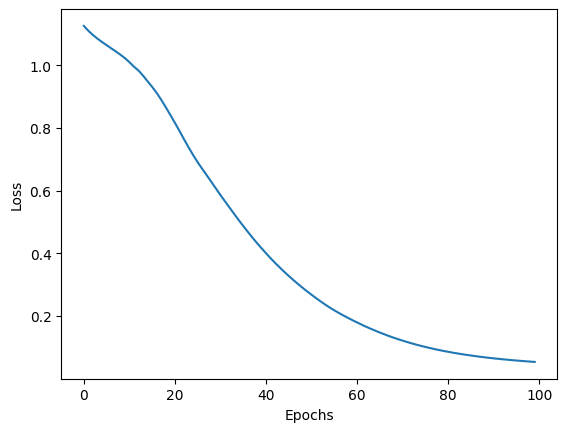

In [25]:
# Graph it out:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epochs')

In [26]:
# Evaluate Model on Test Data Set (validate model on test set)
with torch.no_grad(): # Basically turn off back propogation
  y_eval = model.forward(X_test) # X_test are features from our test set, y_eval will be predictions
  loss = criterion(y_eval, y_test) # Measure the error

In [27]:
loss

tensor(0.1315)

In [30]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    # Will tell us what type of flower class our network thinks it is
    print(f'{i + 1} .) {str(y_val)} \t {y_test[i]}, {y_val.argmax().item()}')

    # Correct or not
    if y_val.argmax().item() == y_test[i]:

      correct += 1
print(f'We got {correct} correct!')


Borough                Length (feet)    Unique roads
----------------------------------------------------
1 .) tensor([-5.8771,  4.4629,  6.5155]) 	 2, 2

Borough                Length (feet)    Unique roads
----------------------------------------------------
2 .) tensor([-7.5451,  4.1668,  9.7293]) 	 2, 2

Borough                Length (feet)    Unique roads
----------------------------------------------------
3 .) tensor([-8.4517,  5.1275, 10.2015]) 	 2, 2

Borough                Length (feet)    Unique roads
----------------------------------------------------
4 .) tensor([-4.3411,  5.6280,  2.5636]) 	 1, 1

Borough                Length (feet)    Unique roads
----------------------------------------------------
5 .) tensor([-7.1838,  4.8757,  8.3023]) 	 2, 2

Borough                Length (feet)    Unique roads
----------------------------------------------------
6 .) tensor([-3.3940,  5.3421,  1.2802]) 	 1, 1

Borough                Length (feet)    Unique roads
----------------